<a href="https://colab.research.google.com/github/vamsiSLU/HDS-5210/blob/main/Vamsi_week14_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [4]:
import pandas as pd
df = pd.read_csv("/content/owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [5]:
# Display the number of rows and columns
rows, columns = df.shape
print(f"The dataset has a total of {rows} rows and {columns} columns.")

The dataset has a total of 429435 rows and 67 columns.


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [6]:
# Count the number of unique values in each column
unique_counts = df.nunique()

# Identify how many unique values each column in the data has.
most_unique_column = unique_counts.idxmax()
most_unique_count = unique_counts.max()

# If the column with the most unique values is likely a unique identifier, find the next most diverse column
if most_unique_count == len(df):  # Likely a unique identifier
    next_most_unique_column = unique_counts[unique_counts != most_unique_count].idxmax()
    next_most_unique_count = unique_counts[unique_counts != most_unique_count].max()
    print(f"The column with the most unique values is '{most_unique_column}' with {most_unique_count} unique values, likely serving as a unique identifier.")
    print(f"The column with the next most unique values is '{next_most_unique_column}' with {next_most_unique_count} unique values.")
else:
    print(f"The column with the most unique values is '{most_unique_column}' with {most_unique_count} unique values.")

# Print the number of unique values in each column
print("\nNumber of unique values in each column:")
print(unique_counts)

The column with the most unique values is 'total_vaccinations' with 83248 unique values.

Number of unique values in each column:
iso_code                                     255
continent                                      6
location                                     255
date                                        1688
total_cases                                36694
                                           ...  
population                                   255
excess_mortality_cumulative_absolute       12612
excess_mortality_cumulative                 4218
excess_mortality                            5474
excess_mortality_cumulative_per_million    13092
Length: 67, dtype: int64


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [8]:
# Identify redundant columns
redundant_columns = [col for col in df.columns if df[col].nunique() == 1]

# Display the redundant columns
if redundant_columns:
    print("The following columns have the same value for every row (redundant):")
    print(redundant_columns)
else:
    print("No redundant columns found.")

No redundant columns found.


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

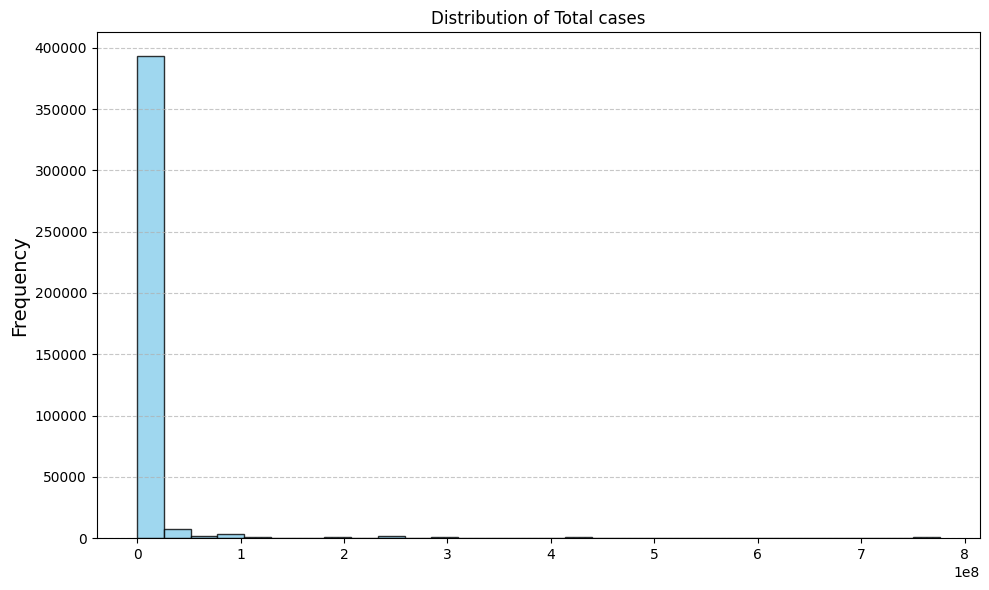

In [9]:
import matplotlib.pyplot as plt
# Dropping the missing values for the selected column
total_cases = df['total_cases'].dropna()

# Creating a histogram for the selected column
plt.figure(figsize=(10, 6))
plt.hist(total_cases, bins=30, edgecolor='black', color='skyblue', alpha=0.8)
plt.title("Distribution of Total cases")
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Interpretation: The histogram illustrates the distribution of total COVID-19 cases, showing a right-skewed pattern with a large concentration of data points at the lower end of the total cases range and a long tail extending towards higher case numbers. The distribution resembles a heavy-tailed, which is typical in real-world phenomena like the spread of infectious diseases. This insight could help epidemiologists and public health officials in modeling the pandemic and developing effective response strategies.

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

<ipython-input-10-c7812fe11f98>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_bin_means = gdp_death_data.groupby('gdp_bin')['total_deaths_per_million'].mean()


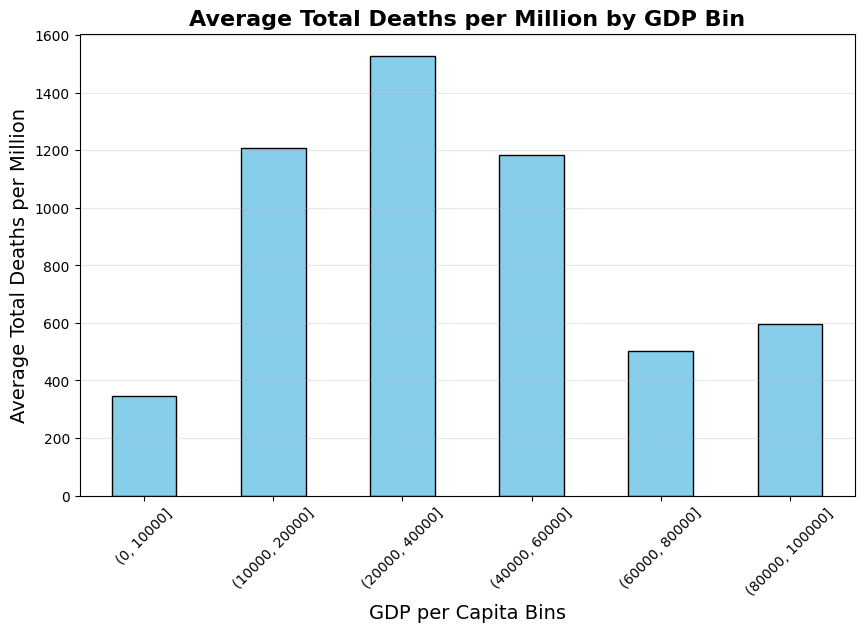

In [10]:
import seaborn as sns
# Filtering the data to exclude missing values for relevant columns
gdp_death_data = df[['gdp_per_capita', 'total_deaths_per_million']].dropna()

# Bin GDP per capita and calculate mean deaths per million
gdp_death_data['gdp_bin'] = pd.cut(gdp_death_data['gdp_per_capita'], bins=[0, 10000, 20000, 40000, 60000, 80000, 100000])
gdp_bin_means = gdp_death_data.groupby('gdp_bin')['total_deaths_per_million'].mean()

# Bar plot for the binned data
plt.figure(figsize=(10, 6))
gdp_bin_means.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Total Deaths per Million by GDP Bin', fontsize=16, weight='bold')
plt.xlabel('GDP per Capita Bins', fontsize=14)
plt.ylabel('Average Total Deaths per Million', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.show()

Interpretation: The bar plot "Average Total Deaths per Million by GDP Bin" shows a complex pattern between a country’s GDP per capita and COVID-19 death rates. Death rates tend to increase from the lowest income group (0–10,000) to the middle-income group (20,000–40,000) but level off or slightly decrease in higher-income groups.

Countries with the lowest GDP often report fewer deaths, possibly due to underreporting, younger populations, or limited testing. In contrast, wealthier nations tend to report higher deaths, likely influenced by older populations, better reporting systems, or differences in healthcare systems and pandemic responses.

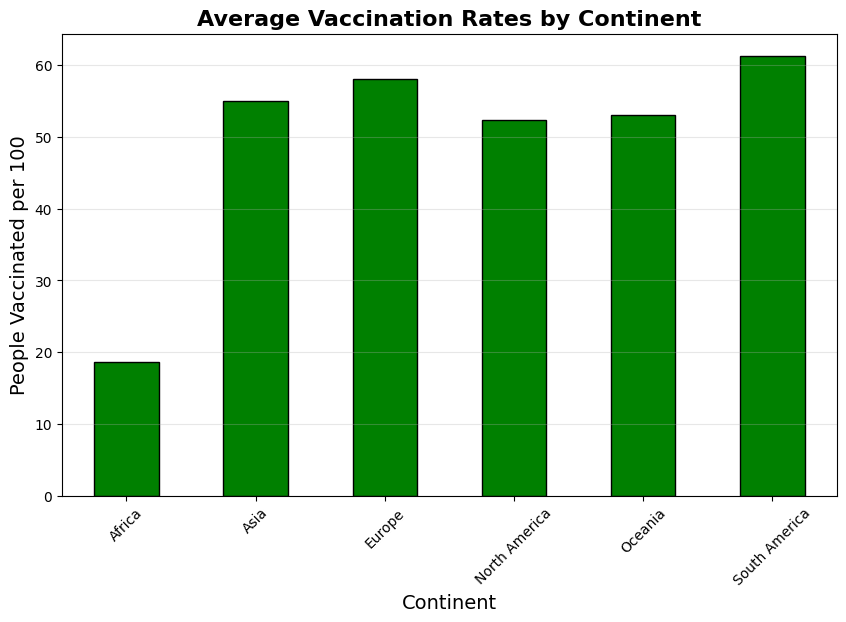

In [11]:
import seaborn as sns

# Grouping by continent and calculate average vaccination rate
vaccination_rates = df.groupby('continent')['people_vaccinated_per_hundred'].mean().dropna()

# Bar chart
plt.figure(figsize=(10, 6))
vaccination_rates.plot(kind='bar', color='green', edgecolor='black')
plt.title('Average Vaccination Rates by Continent', fontsize=16, weight='bold')
plt.xlabel('Continent', fontsize=14)
plt.ylabel('People Vaccinated per 100', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()


Interpretation:
The chart "Average Vaccination Rates by Continent" shows how COVID-19 vaccinations vary across the world. South America has the highest average, with over 70 people vaccinated per 100. Europe and North America also have high rates, around 60 per 100. Asia and Oceania are in the middle, while Africa has the lowest, with fewer than 20 people vaccinated per 100. This gap highlights unequal vaccine access, especially in Africa, and shows the need for more global efforts to make vaccines available to everyone.

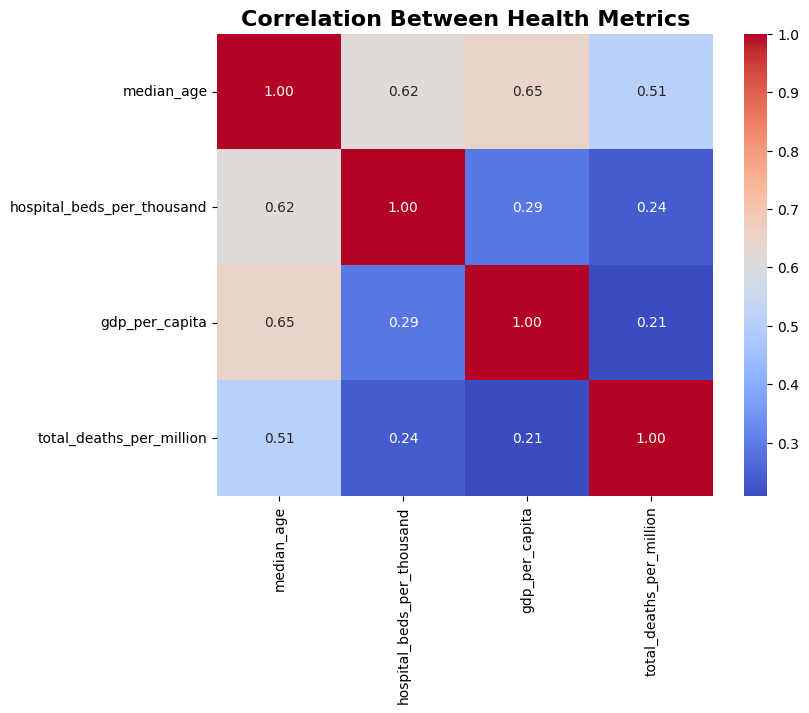

In [12]:
import seaborn as sns

# Selecting relevant columns
health_metrics = df[['median_age', 'hospital_beds_per_thousand', 'gdp_per_capita', 'total_deaths_per_million']]

# Compute correlation matrix
correlation_matrix = health_metrics.corr()

# Heatmap of Correlation Between Health Metrics
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Health Metrics', fontsize=16, weight='bold')
plt.show()


Interpretation:

* The heatmap highlights important connections between health metrics and COVID-19 outcomes. It shows that older populations are linked to higher death rates, and wealthier countries with older populations tend to have more hospital beds.
* Additionally, wealthier countries also have better healthcare infrastructure, as shown by the positive correlation between GDP per capita, median age, and hospital beds.
* However, the data suggests that more hospital beds and higher GDP don't always lower COVID-19 death rates, indicating that other factors play a role. Overall, it emphasizes the complex relationship between age, wealth, and healthcare in shaping the pandemic's impact.

<ipython-input-13-2e8e5341ccb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='continent', y='total_deaths_per_million', palette='coolwarm')


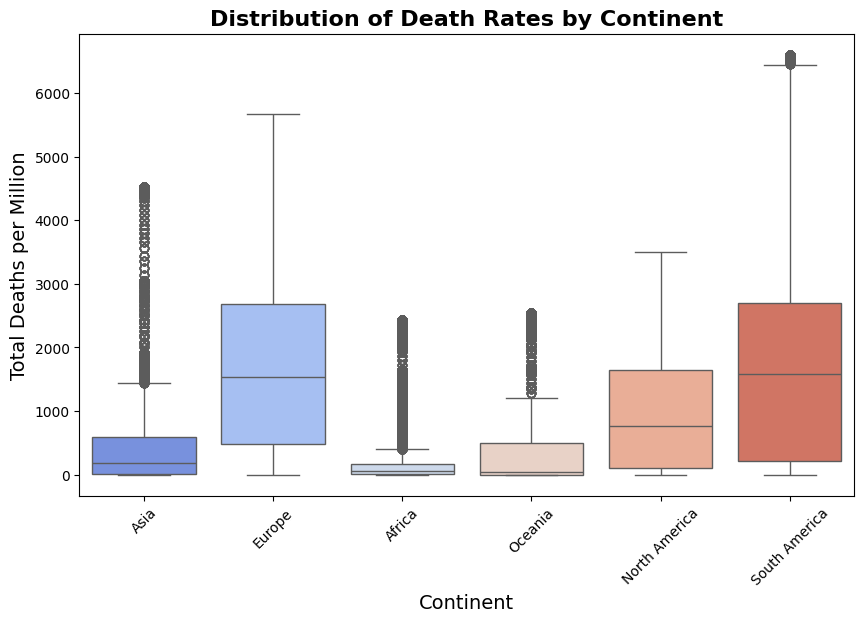

In [13]:
# Box plot of Distribution of Death Rates by Continent
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='continent', y='total_deaths_per_million', palette='coolwarm')
plt.title('Distribution of Death Rates by Continent', fontsize=16, weight='bold')
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Total Deaths per Million', fontsize=14)
plt.xticks(rotation=45)
plt.show()


Interpretation:
The box plot "Distribution of Death Rates by Continent" shows how COVID-19 death rates vary widely between continents. South America has the highest median death rate and the largest range, showing a severe impact with differences across countries. Europe also has high death rates and a wide spread, while North America shows slightly lower rates but still significant variation. Asia’s rates are generally lower, but many outliers suggest uneven outcomes across the region. Africa has the lowest death rates and the smallest variation, possibly due to underreporting. Oceania stands out with very low death rates, likely reflecting successful containment measures. This highlights how the pandemic's impact has differed around the world.

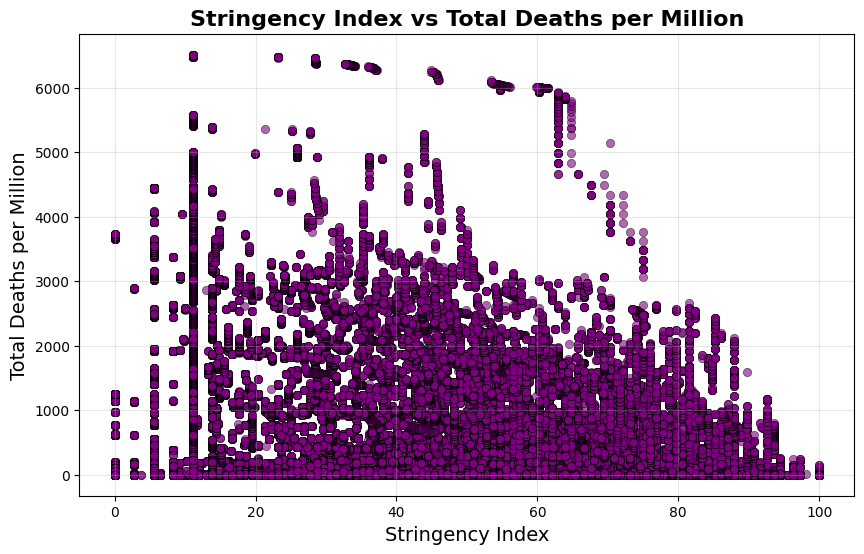

In [14]:
# Scatter plot of Stringency Index vs Total Deaths per Million
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='stringency_index',
    y='total_deaths_per_million',
    alpha=0.6, color='purple', edgecolor='black'
)
plt.title('Stringency Index vs Total Deaths per Million', fontsize=16, weight='bold')
plt.xlabel('Stringency Index', fontsize=14)
plt.ylabel('Total Deaths per Million', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


Interpretation: The scatter plot shows how government policies (measured by the Stringency Index) are linked to COVID-19 death rates (measured by deaths per million). It suggests that stricter policies are generally associated with lower death rates, but the data points are spread out, meaning there are other factors at play besides just the policy measures. This indicates that while stricter responses might help reduce deaths, the overall impact of the pandemic is influenced by multiple variables.



---



## Submitting Your Work

Submit your work as usual.